<a href="https://colab.research.google.com/github/mecan80/DS_projects/blob/master/Insurance_Cust_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project Brief

Insurance companies are always updating their customer segments because of the ever changing profile of their customers, the products they offer and the competitive landscape.

##Objectives:
1. Submit a customer segments list using the company's customer data. 
2. Report on any trends, patterns, customer behaviours or interesting facts about the data.


#Loading Libraries and the Dataset

In [2]:
pip install kmodes

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN, KMeans, AgglomerativeClustering
from kmodes.kprototypes import KPrototypes 
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.pipeline import Pipeline

In [0]:
insurance_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/insurance.csv')

#Exploring the Data

In [8]:
insurance_df.dtypes

Customer                          object
State                             object
Customer_Lifetime_Value            int64
Response                          object
Coverage                          object
Education                         object
Effective_To_Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location_Code                     object
Marital_Status                    object
Monthly_Premium_Auto               int64
Months_Since_Last_Claim            int64
Months_Since_Policy_Inception      int64
Number_of_Open_Complaints          int64
Number_of_Policies                 int64
Policy_Type                       object
Policy                            object
Renew_Offer_Type                  object
Sales_Channel                     object
Total_Claim_Amount               float64
Vehicle_Class                     object
Vehicle_Size                      object
dtype: object

In [9]:
insurance_df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size
0,BU79786,Washington,2764,No,Basic,Bachelor,2/24/11,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6980,No,Extended,Bachelor,1/31/11,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887,No,Premium,Bachelor,2/19/11,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7646,No,Basic,Bachelor,1/20/11,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2814,No,Basic,Bachelor,2002-03-11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [10]:
insurance_df.shape

(9134, 24)

In [11]:
insurance_df.describe()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
count,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000,9134.000000
mean,8004.945697,37657.380009,93.219291,15.097000,48.064594,0.384388,2.966170,434.088794
std,6870.968043,30379.904734,34.407967,10.073257,27.905991,0.910384,2.390182,290.500092
min,1898.000000,0.000000,61.000000,0.000000,0.000000,0.000000,1.000000,0.099007
25%,3994.250000,0.000000,68.000000,6.000000,24.000000,0.000000,1.000000,272.258244
50%,5780.000000,33889.500000,83.000000,14.000000,48.000000,0.000000,2.000000,383.945434
75%,8962.250000,62320.000000,109.000000,23.000000,71.000000,0.000000,4.000000,547.514839
max,83325.000000,99981.000000,298.000000,35.000000,99.000000,5.000000,9.000000,2893.239678


In [7]:
#Checking for null values
insurance_df.isnull().sum()

Customer                         0
State                            0
Customer_Lifetime_Value          0
Response                         0
Coverage                         0
Education                        0
Effective_To_Date                0
EmploymentStatus                 0
Gender                           0
Income                           0
Location_Code                    0
Marital_Status                   0
Monthly_Premium_Auto             0
Months_Since_Last_Claim          0
Months_Since_Policy_Inception    0
Number_of_Open_Complaints        0
Number_of_Policies               0
Policy_Type                      0
Policy                           0
Renew_Offer_Type                 0
Sales_Channel                    0
Total_Claim_Amount               0
Vehicle_Class                    0
Vehicle_Size                     0
dtype: int64

In [12]:
#Checking for count of unique values
insurance_df.nunique()

Customer                         9134
State                               5
Customer_Lifetime_Value          5674
Response                            2
Coverage                            3
Education                           5
Effective_To_Date                  59
EmploymentStatus                    5
Gender                              2
Income                           5694
Location_Code                       3
Marital_Status                      3
Monthly_Premium_Auto              202
Months_Since_Last_Claim            36
Months_Since_Policy_Inception     100
Number_of_Open_Complaints           6
Number_of_Policies                  9
Policy_Type                         3
Policy                              9
Renew_Offer_Type                    4
Sales_Channel                       4
Total_Claim_Amount               5106
Vehicle_Class                       6
Vehicle_Size                        3
dtype: int64

In [13]:
insurance_df.groupby(['State']).agg({'Customer':'count', 'Number_of_Policies':'sum', 'Number_of_Open_Complaints':'sum', 'Total_Claim_Amount':'mean'}) 

,Customer,Number_of_Policies,Number_of_Open_Complaints,Total_Claim_Amount
State,,,,
Arizona,1703,5224,653,425.361446
California,3150,9348,1205,437.819268
Nevada,882,2449,378,438.750566
Oregon,2601,7735,946,433.012542
Washington,798,2337,329,436.343596


In [14]:
insurance_df.groupby(['State', 'Vehicle_Class', 'Vehicle_Size']).agg({'Customer':'count','Total_Claim_Amount':'mean', 'Number_of_Open_Complaints':'sum'})

Customer  ...  Number_of_Open_Complaints
State      Vehicle_Class Vehicle_Size            ...                           
Arizona    Four-Door Car Large               94  ...                         55
                         Medsize            634  ...                        249
                         Small              167  ...                         57
           Luxury Car    Medsize             17  ...                          5
                         Small               11  ...                          5
...                                         ...  ...                        ...
Washington Sports Car    Medsize             20  ...                         15
                         Small                4  ...                          0
           Two-Door Car  Large               17  ...                          8
                         Medsize            126  ...                         50
                         Small               30  ...                          6

[88 rows x 3 columns]

In [15]:
insurance_df.groupby(['Renew_Offer_Type', 'Response']).agg({'Customer':'count', 'Months_Since_Policy_Inception':'mean'})

Customer  Months_Since_Policy_Inception
Renew_Offer_Type Response                                         
Offer1           No            3158                      51.290057
                 Yes            594                      52.252525
Offer2           No            2242                      45.972792
                 Yes            684                      44.991228
Offer3           No            1402                      47.561341
                 Yes             30                      44.000000
Offer4           No            1024                      43.128906

In [16]:
insurance_df.groupby(['Location_Code', 'EmploymentStatus']).agg({'Customer':'count', 'Number_of_Open_Complaints':'sum', 'Monthly_Premium_Auto':'mean', 'Total_Claim_Amount':'mean'})

Customer  ...  Total_Claim_Amount
Location_Code EmploymentStatus            ...                    
Rural         Disabled                33  ...           94.568548
              Employed              1596  ...          111.351429
              Medical Leave           36  ...           91.057504
              Unemployed             108  ...           99.500188
Suburban      Disabled               341  ...          525.338994
              Employed              2688  ...          519.038851
              Medical Leave          354  ...          531.758497
              Retired                274  ...          496.260544
              Unemployed            2122  ...          636.280379
Urban         Disabled                31  ...          322.477116
              Employed              1414  ...          331.373162
              Medical Leave           42  ...          294.163521
              Retired                  8  ...          272.089073
              Unemployed              87  ...          325.211513

[14 rows x 4 columns]

In [17]:
insurance_df.groupby(['Policy_Type', 'Policy']).agg({'Customer':'count', 'Number_of_Policies':'sum', 'Number_of_Open_Complaints':'sum', 'Monthly_Premium_Auto':'mean', 'Total_Claim_Amount':'mean'})

Customer  ...  Total_Claim_Amount
Policy_Type    Policy                  ...                    
Corporate Auto Corporate L1       359  ...          437.787660
               Corporate L2       595  ...          439.183340
               Corporate L3      1014  ...          422.460088
Personal Auto  Personal L1       1240  ...          441.062637
               Personal L2       2122  ...          433.757310
               Personal L3       3426  ...          433.235047
Special Auto   Special L1          66  ...          463.236864
               Special L2         164  ...          432.603295
               Special L3         148  ...          439.041442

[9 rows x 5 columns]

In [0]:
#Converting Date field
insurance_df['Effective_To_Date'] = pd.to_datetime(insurance_df['Effective_To_Date'])
insurance_df['Year_Month'] = insurance_df['Effective_To_Date'].dt.strftime(('%Y-%m'))

In [81]:
insurance_df.head()

,Customer,State,Customer_Lifetime_Value,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Income,Location_Code,Marital_Status,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Total_Claim_Amount,Vehicle_Class,Vehicle_Size,Year_Month
0,BU79786,Washington,2764,No,Basic,Bachelor,2011-02-24,Employed,F,56274,Suburban,Married,69,32,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize,2011-02
1,QZ44356,Arizona,6980,No,Extended,Bachelor,2011-01-31,Unemployed,F,0,Suburban,Single,94,13,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize,2011-01
2,AI49188,Nevada,12887,No,Premium,Bachelor,2011-02-19,Employed,F,48767,Suburban,Married,108,18,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize,2011-02
3,WW63253,California,7646,No,Basic,Bachelor,2011-01-20,Unemployed,M,0,Suburban,Married,106,18,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize,2011-01
4,HB64268,Washington,2814,No,Basic,Bachelor,2002-03-11,Employed,M,43836,Rural,Single,73,12,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize,2002-03


# Transforming Categorical Data into Numerical Data

In [0]:
insurance_num = insurance_df[['Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Total_Claim_Amount']]
insurance_cat = insurance_df[['Customer', 'State', 'Response', 'Coverage', 'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size', 'Year_Month']]

In [83]:
insurance_num.head()

,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
0,2764,56274,69,32,5,0,1,384.811147
1,6980,0,94,13,42,0,8,1131.464935
2,12887,48767,108,18,38,0,2,566.472247
3,7646,0,106,18,65,0,7,529.881344
4,2814,43836,73,12,44,0,1,138.130879


In [84]:
insurance_cat.head()

,Customer,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size,Year_Month
0,BU79786,Washington,No,Basic,Bachelor,2011-02-24,Employed,F,Suburban,Married,Corporate Auto,Corporate L3,Offer1,Agent,Two-Door Car,Medsize,2011-02
1,QZ44356,Arizona,No,Extended,Bachelor,2011-01-31,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer3,Agent,Four-Door Car,Medsize,2011-01
2,AI49188,Nevada,No,Premium,Bachelor,2011-02-19,Employed,F,Suburban,Married,Personal Auto,Personal L3,Offer1,Agent,Two-Door Car,Medsize,2011-02
3,WW63253,California,No,Basic,Bachelor,2011-01-20,Unemployed,M,Suburban,Married,Corporate Auto,Corporate L2,Offer1,Call Center,SUV,Medsize,2011-01
4,HB64268,Washington,No,Basic,Bachelor,2002-03-11,Employed,M,Rural,Single,Personal Auto,Personal L1,Offer1,Agent,Four-Door Car,Medsize,2002-03


In [8]:
#Transforming Categorical Data
le = LabelEncoder()
insurance_cat = insurance_cat.apply(le.fit_transform)
insurance_cat.head()

,Customer,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size,Year_Month
0,600,4,0,0,0,54,1,0,1,1,0,2,0,0,5,1,25
1,5946,0,0,1,0,42,4,0,1,2,1,5,2,0,0,1,24
2,96,2,0,2,0,49,1,0,1,1,1,5,0,0,5,1,25
3,8016,1,0,0,0,31,4,1,1,1,0,1,0,2,3,1,24
4,2488,4,0,0,0,14,1,1,0,2,1,3,0,0,0,1,14


In [9]:
#Merging Numerical and Categorical data back
ins_upd_df = pd.concat([insurance_cat, insurance_num], ignore_index=True,axis = 1)
ins_upd_df.columns = ['Customer', 'State', 'Response', 'Coverage', 'Education', 'Effective_To_Date', 'EmploymentStatus', 'Gender', 'Location_Code', 'Marital_Status', 'Policy_Type', 'Policy', 'Renew_Offer_Type', 'Sales_Channel', 'Vehicle_Class', 'Vehicle_Size', 'Year_Month', 'Customer_Lifetime_Value', 'Income', 'Monthly_Premium_Auto', 'Months_Since_Last_Claim', 'Months_Since_Policy_Inception', 'Number_of_Open_Complaints', 'Number_of_Policies', 'Total_Claim_Amount']
ins_upd_df.head()

,Customer,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size,Year_Month,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount
0,600,4,0,0,0,54,1,0,1,1,0,2,0,0,5,1,25,2764,56274,69,32,5,0,1,384.811147
1,5946,0,0,1,0,42,4,0,1,2,1,5,2,0,0,1,24,6980,0,94,13,42,0,8,1131.464935
2,96,2,0,2,0,49,1,0,1,1,1,5,0,0,5,1,25,12887,48767,108,18,38,0,2,566.472247
3,8016,1,0,0,0,31,4,1,1,1,0,1,0,2,3,1,24,7646,0,106,18,65,0,7,529.881344
4,2488,4,0,0,0,14,1,1,0,2,1,3,0,0,0,1,14,2814,43836,73,12,44,0,1,138.130879


In [10]:
ins_upd_df.shape

(9134, 25)

#Plotting Numerical Data

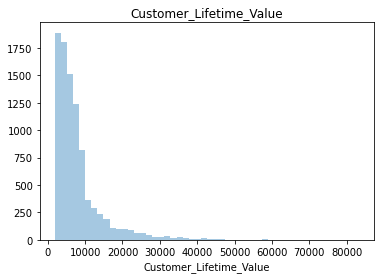

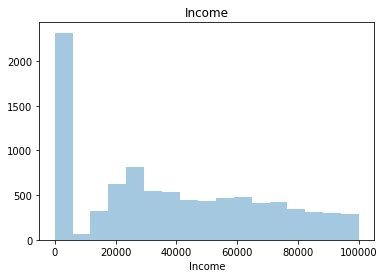

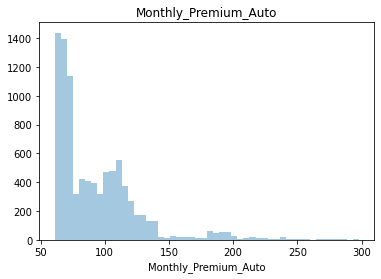

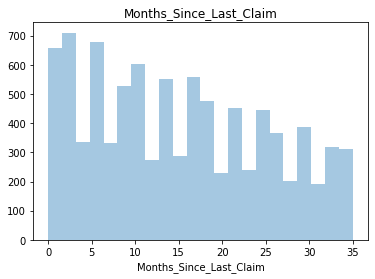

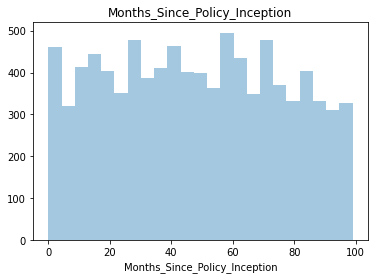

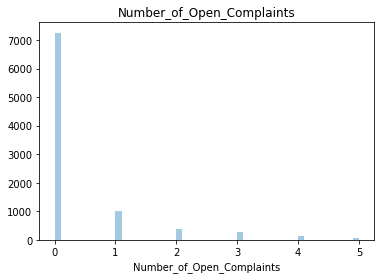

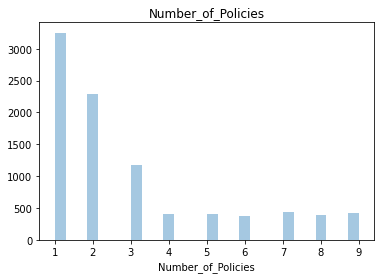

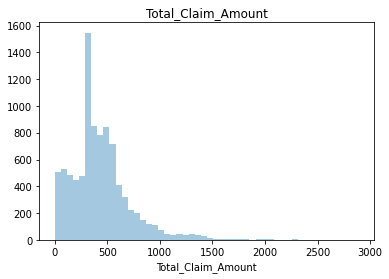

In [87]:
#Plotting numerical data
for column in insurance_num:
  sns.distplot(insurance_num[column], kde=False)
  plt.title(f'{column}')
  plt.show()

#Clustering Using KPrototypes

In [0]:
#Set variable
X = ins_upd_df

In [0]:
#Scale the data
std_scale = StandardScaler()

#fit and transform the data at the same time
X_scale = std_scale.fit_transform(X)

In [0]:
#Running KPrototype Clustering, n_clusters=8, init='Cao' - Default
kproto = KPrototypes(n_clusters=8, init='Cao')
clusters = kproto.fit_predict(X_scale, categorical=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [97]:
kproto.cluster_centroids_

[array([[ 3.01275045,  0.04142745,  0.38640906, -0.00922969, -0.01524777,
         -0.14541027, -0.40424676,  0.1193418 ],
        [-0.20272464, -0.02333662, -0.21672638,  0.03094651, -0.08346538,
         -0.2225226 ,  1.90937626, -0.15011914],
        [-0.2460648 ,  0.88139556, -0.24242448, -0.19798747,  0.92244554,
         -0.28011617, -0.36344041, -0.62315902],
        [-0.24595499,  0.66530093, -0.24087268, -0.1212815 , -0.93545589,
         -0.27436237, -0.4150696 , -0.42351313],
        [-0.25896749,  0.07928854, -0.20922848, -0.01342036,  0.03894195,
          2.94583328, -0.04052655, -0.20065115],
        [-0.20455824, -0.93714021, -0.07904472, -0.75137716,  0.24302779,
         -0.26841647, -0.33520094,  0.39626904],
        [-0.23963985, -0.7065008 , -0.16248806,  1.13593085, -0.09104452,
         -0.21870886, -0.39921647,  0.14609319],
        [ 0.88199127, -0.23531709,  3.03505959,  0.04418229,  0.05247072,
         -0.05041275,  0.05766067,  2.537106  ]]),
 array([[-1.73

In [98]:
#Checking the cost of the clusters created.
kproto.cost_

77156.13521979943

In [0]:
#Adding the predicted clusters to the main dataset
ins_upd_df['cluster_id'] = clusters

In [100]:
ins_upd_df.head()

,Customer,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size,Year_Month,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,cluster_id
0,600,4,0,0,0,54,1,0,1,1,0,2,0,0,5,1,25,2764,56274,69,32,5,0,1,384.811147,3
1,5946,0,0,1,0,42,4,0,1,2,1,5,2,0,0,1,24,6980,0,94,13,42,0,8,1131.464935,1
2,96,2,0,2,0,49,1,0,1,1,1,5,0,0,5,1,25,12887,48767,108,18,38,0,2,566.472247,3
3,8016,1,0,0,0,31,4,1,1,1,0,1,0,2,3,1,24,7646,0,106,18,65,0,7,529.881344,1
4,2488,4,0,0,0,14,1,1,0,2,1,3,0,0,0,1,14,2814,43836,73,12,44,0,1,138.130879,3


In [101]:
#Checking the clusters created
ins_clusters = pd.DataFrame(ins_upd_df['cluster_id'].value_counts())
ins_clusters

,cluster_id
3,1701
2,1538
5,1521
6,1414
1,1331
4,681
0,496
7,452


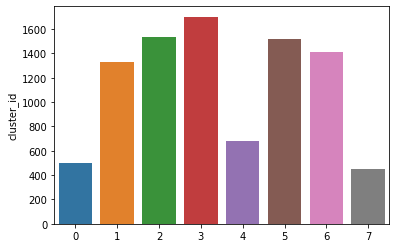

In [102]:
sns.barplot(x=ins_clusters.index, y=ins_clusters['cluster_id']);

In [104]:
ins_upd_df.head()

,Customer,State,Response,Coverage,Education,Effective_To_Date,EmploymentStatus,Gender,Location_Code,Marital_Status,Policy_Type,Policy,Renew_Offer_Type,Sales_Channel,Vehicle_Class,Vehicle_Size,Year_Month,Customer_Lifetime_Value,Income,Monthly_Premium_Auto,Months_Since_Last_Claim,Months_Since_Policy_Inception,Number_of_Open_Complaints,Number_of_Policies,Total_Claim_Amount,cluster_id
0,600,4,0,0,0,54,1,0,1,1,0,2,0,0,5,1,25,2764,56274,69,32,5,0,1,384.811147,3
1,5946,0,0,1,0,42,4,0,1,2,1,5,2,0,0,1,24,6980,0,94,13,42,0,8,1131.464935,1
2,96,2,0,2,0,49,1,0,1,1,1,5,0,0,5,1,25,12887,48767,108,18,38,0,2,566.472247,3
3,8016,1,0,0,0,31,4,1,1,1,0,1,0,2,3,1,24,7646,0,106,18,65,0,7,529.881344,1
4,2488,4,0,0,0,14,1,1,0,2,1,3,0,0,0,1,14,2814,43836,73,12,44,0,1,138.130879,3


In [0]:
ins_upd_df.to_csv('insurance_upd.csv')

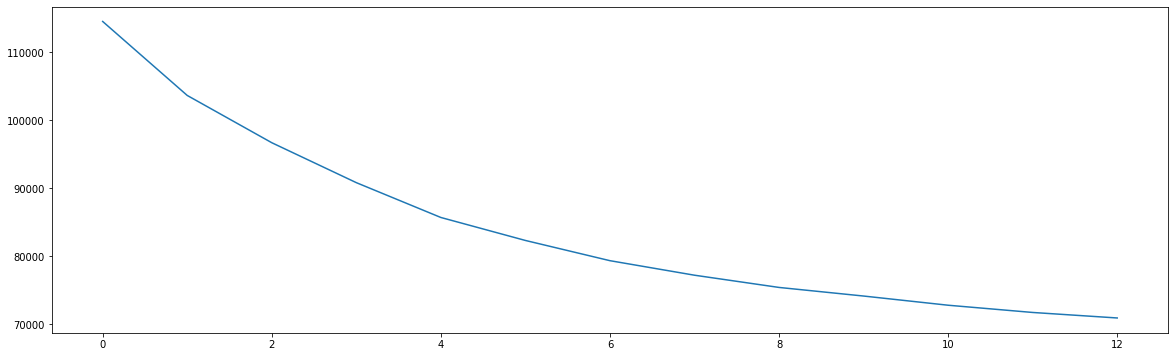

In [103]:
#Choosing optimal K
cost = []
for num_clusters in list(range(1,14)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Cao')
    kproto.fit_predict(X_scale, categorical=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])
    cost.append(kproto.cost_)

plt.figure(figsize=(20,6))   
plt.plot(cost)

In [0]:
#Running KPrototype Clustering, n_clusters=4, init='Cao' 
kproto = KPrototypes(n_clusters=4, init='Cao')
clusters = kproto.fit_predict(X_scale, categorical=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16])

In [0]:
#Adding the predicted clusters to the main dataset
ins_upd_df['cluster_id'] = clusters

In [16]:
#Checking the clusters created
ins_clusters = pd.DataFrame(ins_upd_df['cluster_id'].value_counts())
ins_clusters

,cluster_id
1,5172
2,1695
3,1499
0,768


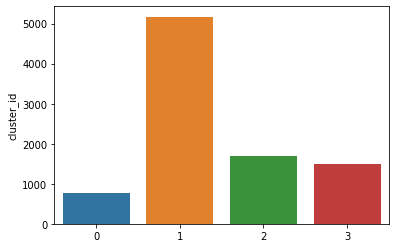

In [17]:
sns.barplot(x=ins_clusters.index, y=ins_clusters['cluster_id']);

In [0]:
ins_upd_df.to_csv('insurance_4clusters.csv')